In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [146]:
data = pd.read_excel("Typhoid_Dataset.xlsx")
data.head(5)

,Age,Gender,headache,muscle pain,nausea,diarrhea,cough,fever range (deg F),Hemoglobin (g/dL),Platelet Count,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mg/dL),typhoid
0,24,Male,1,1,1,0,1,101.8,13.7,272673,0rmal,8.2,4.2,1
1,42,Male,0,0,1,0,1,104.8,11.3,175743,0rmal,8.9,4.5,1
2,32,Female,1,0,1,1,0,101.5,12.8,217500,Escherichia coli,8.8,4.8,1
3,59,Male,0,1,1,1,1,104.9,13.5,247444,Klebsiella pneumoniae,9.4,3.5,1
4,37,Female,1,1,0,0,0,100.4,13.2,257447,0rmal,9.1,4.0,0


In [147]:
data.shape

(659, 14)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     659 non-null    int64  
 1   Gender                  659 non-null    object 
 2   headache                659 non-null    int64  
 3   muscle pain             659 non-null    int64  
 4   nausea                  659 non-null    int64  
 5   diarrhea                659 non-null    int64  
 6   cough                   659 non-null    int64  
 7   fever range (deg F)     659 non-null    float64
 8   Hemoglobin (g/dL)       659 non-null    float64
 9   Platelet Count          659 non-null    int64  
 10  Urine Culture Bacteria  659 non-null    object 
 11  Calcium (mg/dL)         659 non-null    float64
 12  Potassium (mg/dL)       659 non-null    float64
 13  typhoid                 659 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory 

In [149]:
data.isnull().sum()

Age                       0
Gender                    0
headache                  0
muscle pain               0
nausea                    0
diarrhea                  0
cough                     0
fever range (deg F)       0
Hemoglobin (g/dL)         0
Platelet Count            0
Urine Culture Bacteria    0
Calcium (mg/dL)           0
Potassium (mg/dL)         0
typhoid                   0
dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     659 non-null    int64  
 1   Gender                  659 non-null    object 
 2   headache                659 non-null    int64  
 3   muscle pain             659 non-null    int64  
 4   nausea                  659 non-null    int64  
 5   diarrhea                659 non-null    int64  
 6   cough                   659 non-null    int64  
 7   fever range (deg F)     659 non-null    float64
 8   Hemoglobin (g/dL)       659 non-null    float64
 9   Platelet Count          659 non-null    int64  
 10  Urine Culture Bacteria  659 non-null    object 
 11  Calcium (mg/dL)         659 non-null    float64
 12  Potassium (mg/dL)       659 non-null    float64
 13  typhoid                 659 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory 

In [151]:
data["typhoid"].value_counts()

typhoid
1    500
0    159
Name: count, dtype: int64

In [152]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [153]:
data["Gender"] = data["Gender"].replace(['Male', 'Female'], [1, 2])

In [154]:
data["Gender"].unique()

array([1, 2], dtype=int64)

In [155]:
data["Urine Culture Bacteria"].value_counts()

Urine Culture Bacteria
0rmal                    286
Escherichia coli         211
Klebsiella pneumoniae    162
Name: count, dtype: int64

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
Le = LabelEncoder()

In [158]:
data["Urine Culture Bacteria"] = Le.fit_transform(data["Urine Culture Bacteria"])
data["Urine Culture Bacteria"].value_counts()

Urine Culture Bacteria
0    286
1    211
2    162
Name: count, dtype: int64

In [159]:
data["typhoid"].value_counts(normalize=True)

typhoid
1    0.758725
0    0.241275
Name: proportion, dtype: float64

<Axes: xlabel='typhoid'>

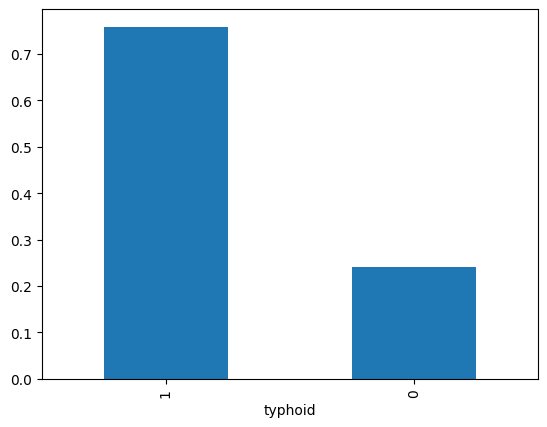

In [160]:
data["typhoid"].value_counts(normalize=True).plot(kind="bar")

In [161]:
data.groupby("Gender").mean()

,Age,headache,muscle pain,nausea,diarrhea,cough,fever range (deg F),Hemoglobin (g/dL),Platelet Count,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mg/dL),typhoid
Gender,,,,,,,,,,,,,
1,42.610169,0.641243,0.525424,0.542373,0.548023,0.564972,102.346328,12.874576,220987.279661,0.757062,9.100282,4.387853,0.728814
2,42.632787,0.600000,0.590164,0.600000,0.580328,0.590164,102.567541,12.847869,219507.163934,0.875410,9.048525,4.327869,0.793443


In [162]:
data.head(10)

,Age,Gender,headache,muscle pain,nausea,diarrhea,cough,fever range (deg F),Hemoglobin (g/dL),Platelet Count,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mg/dL),typhoid
0,24,1,1,1,1,0,1,101.8,13.7,272673,0,8.2,4.2,1
1,42,1,0,0,1,0,1,104.8,11.3,175743,0,8.9,4.5,1
2,32,2,1,0,1,1,0,101.5,12.8,217500,1,8.8,4.8,1
3,59,1,0,1,1,1,1,104.9,13.5,247444,2,9.4,3.5,1
4,37,2,1,1,0,0,0,100.4,13.2,257447,0,9.1,4.0,0
5,42,1,1,0,0,1,1,102.5,12.9,256066,0,9.2,4.1,1
6,60,2,1,1,0,0,1,101.1,14.1,252139,1,9.3,5.1,0
7,41,1,1,0,0,1,1,101.6,14.1,255318,0,8.7,5.0,0
8,58,2,0,1,1,1,1,104.1,12.1,155222,1,8.5,4.1,1
9,27,1,1,1,0,0,1,100.7,14.1,252186,1,8.6,4.8,0


In [163]:
data.columns

Index(['Age', 'Gender', 'headache', 'muscle pain', 'nausea', 'diarrhea',
       'cough', 'fever range (deg F)', 'Hemoglobin (g/dL)', 'Platelet Count',
       'Urine Culture Bacteria', 'Calcium (mg/dL)', 'Potassium (mg/dL)',
       'typhoid'],
      dtype='object')

In [164]:
data.iloc[:,13]

0      1
1      1
2      1
3      1
4      0
      ..
654    1
655    0
656    1
657    1
658    0
Name: typhoid, Length: 659, dtype: int64

In [165]:
data.iloc[:,0:13 ]

,Age,Gender,headache,muscle pain,nausea,diarrhea,cough,fever range (deg F),Hemoglobin (g/dL),Platelet Count,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mg/dL)
0,24,1,1,1,1,0,1,101.8,13.7,272673,0,8.2,4.2
1,42,1,0,0,1,0,1,104.8,11.3,175743,0,8.9,4.5
2,32,2,1,0,1,1,0,101.5,12.8,217500,1,8.8,4.8
3,59,1,0,1,1,1,1,104.9,13.5,247444,2,9.4,3.5
4,37,2,1,1,0,0,0,100.4,13.2,257447,0,9.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,69,1,1,0,1,1,1,103.9,11.0,134200,2,9.5,4.5
655,28,2,1,1,0,0,1,100.5,15.6,251714,1,8.9,4.2
656,68,2,1,0,0,1,1,100.7,13.9,262155,1,9.0,4.2
657,27,1,0,0,1,0,0,103.1,12.3,240582,2,9.2,4.1


In [166]:
X = data.iloc[:,0:13]
y = data.iloc[:,13]

In [167]:
X.shape

(659, 13)

In [168]:
y.shape

(659,)

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [170]:
X_train.shape

(527, 13)

In [171]:
y_train.shape

(527,)

In [172]:
X_test.shape

(132, 13)

In [173]:
y_test.shape

(132,)

In [174]:
# scale the data between 0 and 1

In [207]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler on the training data
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)

# Save the fitted scaler
joblib.dump(min_max_scaler, 'Model/scaler.pkl')


['Model/scaler.pkl']

In [208]:
X_train_scaled[0,0]

0.6538461538461539

In [209]:
X_train.iloc[0,0]

52

In [210]:
# Transform the test data using the fitted scaler
X_test_scaled = min_max_scaler.transform(X_test)


In [178]:
# create random forest classifier

In [211]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
# Save the trained model and reference columns
joblib.dump((model, X_train.columns), 'Model/TyphoidNew.pkl')


['Model/TyphoidNew.pkl']

In [212]:
ref_cols = list(X_test.columns)

In [213]:
ref_cols

['Age',
 'Gender',
 'headache',
 'muscle pain',
 'nausea',
 'diarrhea',
 'cough',
 'fever range (deg F)',
 'Hemoglobin (g/dL)',
 'Platelet Count',
 'Urine Culture Bacteria',
 'Calcium (mg/dL)',
 'Potassium (mg/dL)']

In [214]:
y_pred = clf.predict(X_test_scaled)

In [215]:
y_pred[0:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [216]:
y_test[0:10]

110    1
35     1
487    1
55     1
196    1
589    0
248    1
238    0
526    1
94     1
Name: typhoid, dtype: int64

In [217]:
prediction = clf.predict(X_test_scaled)
prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [218]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [219]:
#balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
balanced_accuracy = round(balanced_accuracy,2)
print("balanced accuracy: ", balanced_accuracy)

balanced accuracy:  1.0


In [220]:
# F1 Score
f1_score = f1_score(y_test, y_pred)
f1_score = round(f1_score,2)
print("F1_score: ", f1_score)

F1_score:  1.0


In [221]:
# Recall
recall_ = recall_score(y_test, y_pred)
recall_ = round(recall_)
print("recall: ", recall_)

recall:  1


In [222]:
# Precision
Precision_ = precision_score(y_test, y_pred)
Precision_ = round(Precision_)
print("Precision: ", Precision_)

Precision:  1


In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       104

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [225]:
mega = ["24","1", "1", "1", "1", "0", "1", "101.8", "13.7", "272673", "0", "8.2", "4.2"]

In [226]:
values = ['Age',
 'Gender',
 'headache',
 'muscle pain',
 'nausea',
 'diarrhea',
 'cough',
 'fever range (deg F)',
 'Hemoglobin (g/dL)',
 'Platelet Count',
 'Urine Culture Bacteria',
 'Calcium (mg/dL)',
 'Potassium (mg/dL)']

In [236]:
import joblib
import pandas as pd

# Load the trained model and reference columns
model, ref_cols = joblib.load("Model/TyphoidNew.pkl")

# Load the fitted scaler
scaler = joblib.load('Model/scaler.pkl')
mega = [["37","2", "1", "1", "0", "0", "0", "100.4", "13.2", "257447", "0", "9.1", "4.0"]]

# Ensure new data has the same columns as the training data
new_data_df = pd.DataFrame(mega, columns=ref_cols)

# Transform new data using the loaded scaler
mega_data_scaled = scaler.transform(new_data_df)

# Make predictions using the model
predictions = model.predict(mega_data_scaled)

# Print the prediction
print("Predicted value:", predictions[0])



Predicted value: 0
